<a href="https://colab.research.google.com/github/cbear528/CivEng-203N-Sp21/blob/main/CE203N_Xarray_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Carissa Abraham
# CE 203N
# Homework 1
# Assignment 7: Xarray Fundamentals with Atmospheric Radiation Data
# 2/16/21

In [ ]:
! pip install wget
! pip install netCDF4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import wget
import pandas as pd

from netCDF4 import Dataset
plt.rcParams['figure.figsize'] = 12, 6

url = 'http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc'

file = r'C:\Users\caris\Downloads\CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc'

data = wget.download(url)

In [ ]:
ds = Dataset(data)
xarray = xr.open_dataset('CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc')
print('1.1)')
print(xarray)
print('1.2)')
for var in ds.variables.values():
    print(f'{var.name:30} ==> {var.long_name:10}')
print('Variable units:')
for var in ds.variables.values():
    print(f'{var.name:30} ==> {var.units:10}')


1.1)
<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360, time: 203)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables:
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    toa_cre_sw_mon               (time, lat, lon) float32 ...
    toa_cre_lw_mon               (time, lat, lon) float32 ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_dayni

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables:
    toa_sw_all_mon               (lat, lon) float32 122.27177 ... 104.44447
    toa_lw_all_mon               (lat, lon) float32 141.0882 ... 194.10733
    toa_net_all_mon              (lat, lon) float32 -91.287636 ... -126.26464
    toa_sw_clr_mon               (lat, lon) float32 119.93927 ... 89.46622
    toa_lw_clr_mon               (lat, lon) float32 140.16454 ... 200.43248
    toa_net_clr_mon              (lat, lon) float32 -88.03184 ... -117.617226
    toa_cre_sw_mon               (lat, lon) float32 -2.3314087 ... -14.978885
    toa_cre_lw_mon               (lat, lon) float32 -0.92165476 ... 6.3279757
    toa_cre_net_mon              (lat, lon) float32 -3.2528844 ... -8.650782
    solar_mon                    (lat, lon) float

Text(0, 0.5, 'latitude (degrees)')

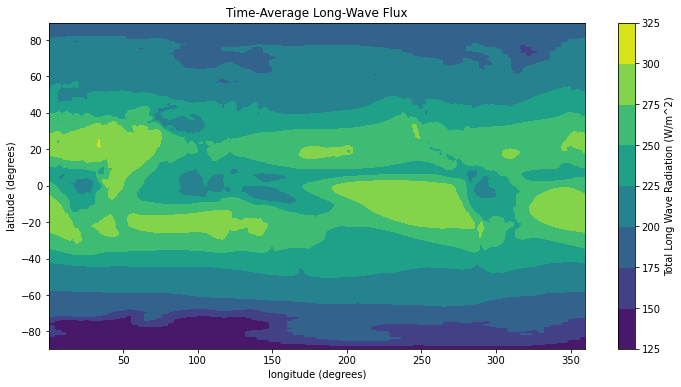

In [ ]:
#2.1

timeavg = xarray.mean('time')
print(timeavg)

#2.2
toa_longwave = timeavg['toa_lw_all_mon'][:]
toa_solarrad = timeavg['solar_mon'][:]
toa_shortwave = timeavg['toa_sw_all_mon'][:]
toa_net = timeavg['toa_net_all_mon'][:]

lat = xarray['lat'][:]
lon = xarray['lon'][:]


Text(0, 0.5, 'latitude (degrees)')

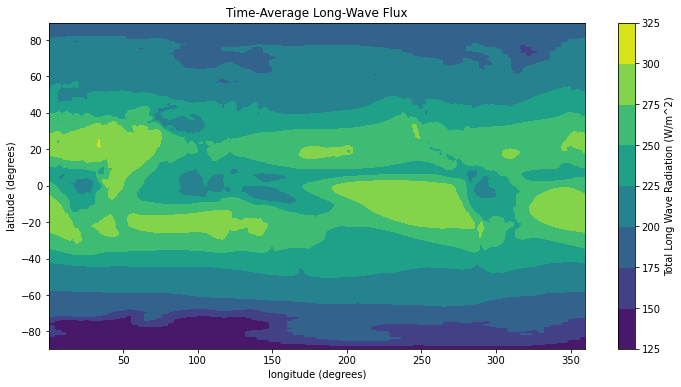

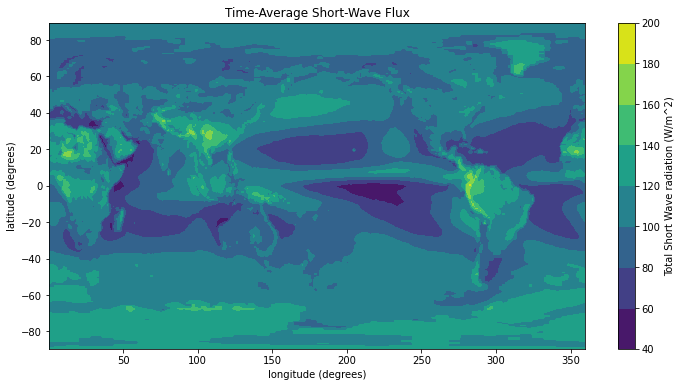

In [ ]:

fig, ax = plt.subplots()
CS = ax.contourf(lon, lat, toa_longwave)
CB = fig.colorbar(CS)
ax.set_title('Time-Average Long-Wave Flux')
CB.set_label('Total Long Wave Radiation (W/m^2)')
plt.xlabel('longitude (degrees)')
plt.ylabel('latitude (degrees)')


fig, ax = plt.subplots()
CS = ax.contourf(lon, lat, toa_shortwave)
CB = fig.colorbar(CS)
ax.set_title('Time-Average Short-Wave Flux')
CB.set_label('Total Short Wave radiation (W/m^2)')
plt.xlabel('longitude (degrees)')
plt.ylabel('latitude (degrees)')

Text(0, 0.5, 'latitude (degrees)')

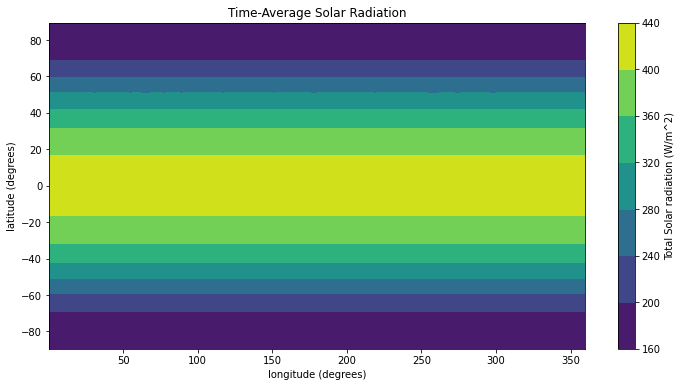

In [ ]:
fig, ax = plt.subplots()
CS = ax.contourf(lon, lat, toa_solarrad)
CB = fig.colorbar(CS)
ax.set_title('Time-Average Solar Radiation')
CB.set_label('Total Solar radiation (W/m^2)')
plt.xlabel('longitude (degrees)')
plt.ylabel('latitude (degrees)')

Text(0, 0.5, 'latitude (degrees)')

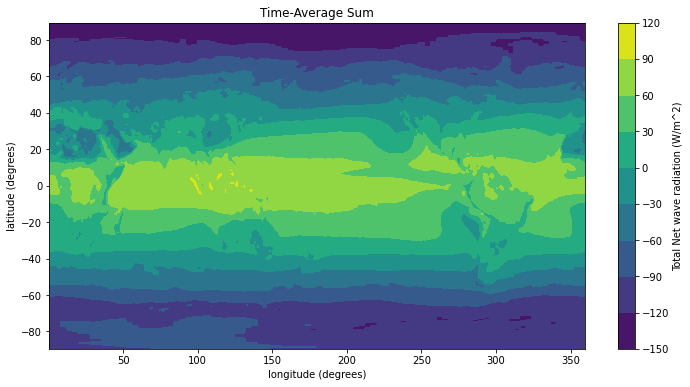

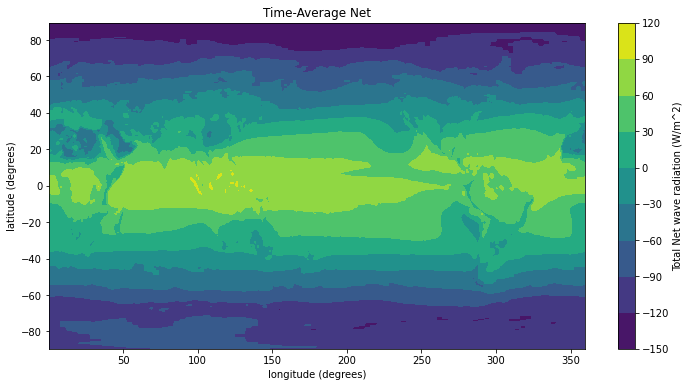

In [ ]:
#2.3
total = toa_solarrad - toa_shortwave - toa_longwave
fig, ax = plt.subplots()
CS = ax.contourf(lon, lat, total)
CB = fig.colorbar(CS)
ax.set_title('Time-Average Sum')
CB.set_label('Total Net wave radiation (W/m^2)')
plt.xlabel('longitude (degrees)')
plt.ylabel('latitude (degrees)')

fig, ax = plt.subplots()
CS = ax.contourf(lon, lat, toa_net)
CB = fig.colorbar(CS)
ax.set_title('Time-Average Net')
CB.set_label('Total Net wave radiation (W/m^2)')
plt.xlabel('longitude (degrees)')
plt.ylabel('latitude (degrees)')


In [ ]:
#3.1
globalavg = xarray['toa_net_all_mon'].mean('time').mean('lat').mean('lon')
print('Unweighted average net radiation: %.2f' %np.double(globalavg))
weight = np.pi/2*np.cos(np.radians(xarray['toa_net_all_mon']['lat']))
print('Mean of weighting: %.3f' %weight.mean())


#3.3
avg2 = xarray['toa_net_all_mon'].mean('time').mean('lon')
avg3 = avg2*weight
avg4 = avg3.mean('lat')
print('New average net energy imbalance: %.3f W/m^2' %np.double(avg4))
print('For 2005-2010, NASA found a total Earth energy imbalance of +0.58±0.15 W/m^2')
print('so this seems plausible')

Unweighted average net radiation: -28.73
Mean of weighting: 1.000
New average net energy imbalance: 0.878 W/m^2
For 2005-2010, NASA found a total Earth energy imbalance of +0.58±0.15 W/m^2
so this seems plausible


In [ ]:
#3.4
weighted_toa_sw = xarray['toa_sw_all_mon']*weight
weighted_toa_sw = weighted_toa_sw.mean('time').mean('lat').mean('lon')
print('Weighted TOA Short Wave Radiation: %.1f W/m^2' %weighted_toa_sw)

weighted_toa_lw = xarray['toa_lw_all_mon']*weight
weighted_toa_lw = weighted_toa_lw.mean('time').mean('lat').mean('lon')
print('Weighted TOA Long Wave Radiation: %.1f W/m^2' %weighted_toa_lw)

weighted_toa_solar = xarray['solar_mon']*weight
weighted_toa_solar = weighted_toa_solar.mean('time').mean('lat').mean('lon')
print('Weighted TOA Solar Radiation: %.1f W/m^2' %weighted_toa_solar)

Weighted TOA Short Wave Radiation: 99.1 W/m^2
Weighted TOA Long Wave Radiation: 240.3 W/m^2
Weighted TOA Solar Radiation: 340.3 W/m^2


In [ ]:

# find surface area of earth
#4.1
dlambda = xarray['toa_net_all_mon']['lat'][2]-xarray['toa_net_all_mon']['lat'][1]
dchi = xarray['toa_net_all_mon']['lon'][2]-xarray['toa_net_all_mon']['lon'][1]
area = ((6371000)**2)*np.cos(np.radians(xarray['toa_net_all_mon']['lat']))*np.radians(dlambda)*np.radians(dchi)
areaxr = area*xr.ones_like(xarray['toa_net_all_mon'])
areaxr = areaxr.mean('time')

totSA = areaxr.sum('lat').sum('lon')
print("Total Area: %.3e m^2" %np.double(totSA))
checkSA = 4*np.pi*(6371000**2)
print("Check Total Suface Area (4*pi*R^2): %.3e m^2" %checkSA)

Total Area: 5.101e+14 m^2
Check Total Suface Area (4*pi*R^2): 5.101e+14 m^2


Text(0.5, 1.0, '4.2) Total Net Radiation in Each Latitude Band')

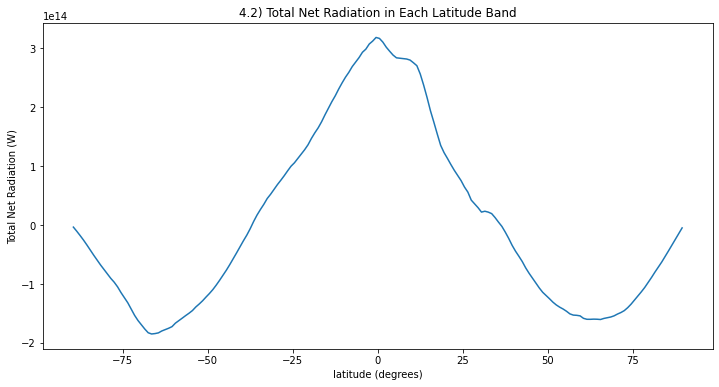

In [ ]:
#4.2
totnetrad = xarray['toa_net_all_mon']*areaxr
totnetrad = totnetrad.mean('time').sum('lon')
plt.plot(lat, totnetrad)
plt.xlabel('latitude (degrees)')
plt.ylabel('Total Net Radiation (W)')
plt.title('4.2) Total Net Radiation in Each Latitude Band')


Text(0.5, 1.0, '4.3) Cumulative Sum in Latitude of Net Radiation')

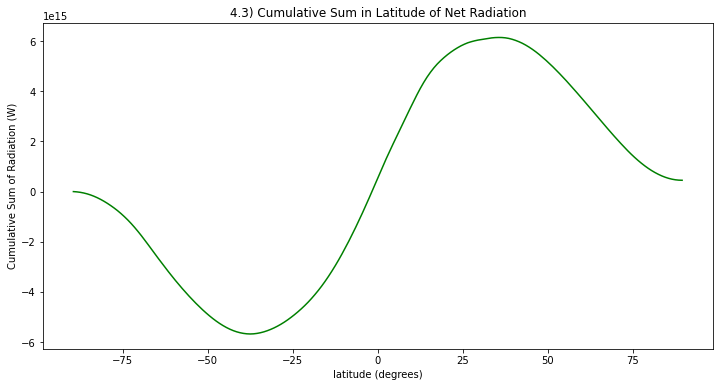

In [ ]:
#4.3
cum_sum = totnetrad.cumsum('lat')
fig, ax = plt.subplots()
plt.plot(lat, cum_sum, color='green')
plt.xlabel('latitude (degrees)')
plt.ylabel('Cumulative Sum of Radiation (W)')
plt.title('4.3) Cumulative Sum in Latitude of Net Radiation')

Text(0, 0.5, 'latitude (degrees)')

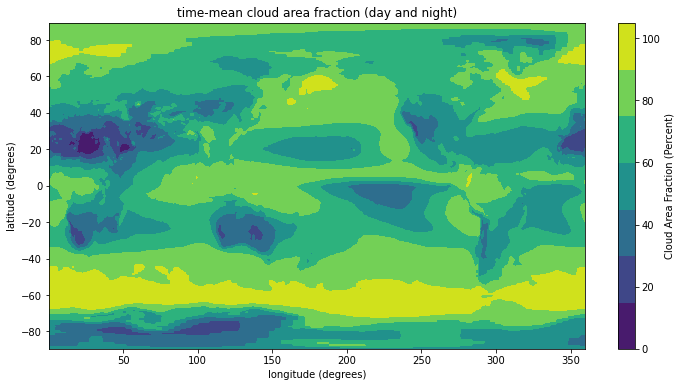

In [ ]:
#5.1 time mean cloud area fraction
avgcloud = xarray['cldarea_total_daynight_mon'].mean('time')
fig, ax = plt.subplots()
CS = ax.contourf(lon, lat, avgcloud)
CB = fig.colorbar(CS)
ax.set_title('time-mean cloud area fraction (day and night)')
CB.set_label('Cloud Area Fraction (Percent)')
CB.set_ticklabels([0,20,40,60,80,100])
CB.set_ticks([0,20,40,60,80,100], update_ticks=True)
plt.xlabel('longitude (degrees)')
plt.ylabel('latitude (degrees)')


/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0, 0.5, 'latitude (degrees)')

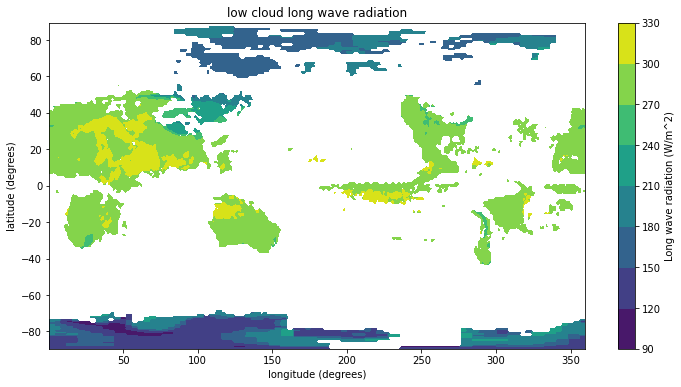

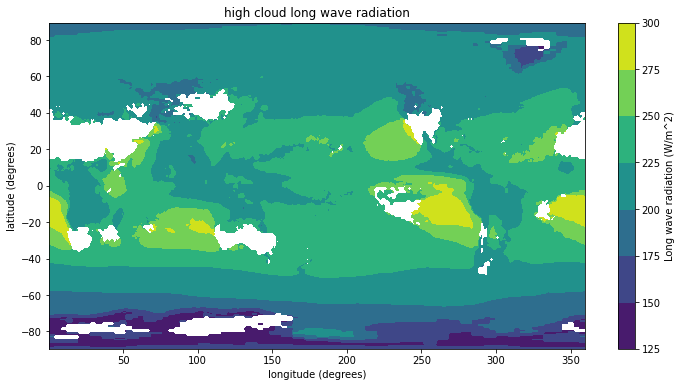

In [ ]:
#5.2
lowcloud_lw = xarray['toa_lw_all_mon'].where(xarray['cldarea_total_daynight_mon']<25).mean('time')
highcloud_lw = xarray['toa_lw_all_mon'].where(xarray['cldarea_total_daynight_mon']>75).mean('time')

#5.3
fig, ax = plt.subplots()
CS = ax.contourf(lon, lat, lowcloud_lw)
CB = fig.colorbar(CS)
ax.set_title('low cloud long wave radiation')
CB.set_label('Long wave radiation (W/m^2)')
plt.xlabel('longitude (degrees)')
plt.ylabel('latitude (degrees)')

fig, ax = plt.subplots()
CS = ax.contourf(lon,lat,highcloud_lw)
CB = fig.colorbar(CS)
ax.set_title('high cloud long wave radiation')
CB.set_label('Long wave radiation (W/m^2)')
plt.xlabel('longitude (degrees)')
plt.ylabel('latitude (degrees)')

/usr/local/lib/python3.6/dist-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0, 0.5, 'latitude (degrees)')

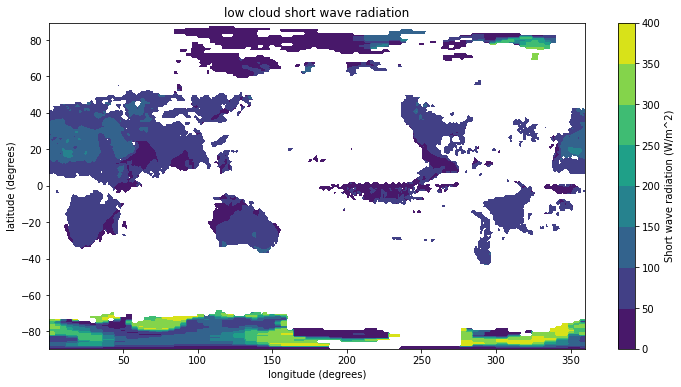

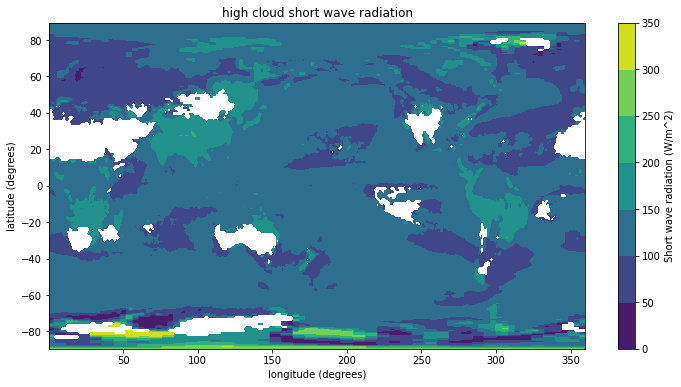

In [ ]:
#5.4
lowcloud_sw = xarray['toa_sw_all_mon'].where(xarray['cldarea_total_daynight_mon']<=25).mean('time')
highcloud_sw = xarray['toa_sw_all_mon'].where(xarray['cldarea_total_daynight_mon']>=75).mean('time')
fig, ax = plt.subplots()
CS = ax.contourf(lon, lat, lowcloud_sw)
CB = fig.colorbar(CS)
ax.set_title('low cloud short wave radiation')
CB.set_label('Short wave radiation (W/m^2)')
plt.xlabel('longitude (degrees)')
plt.ylabel('latitude (degrees)')

fig, ax = plt.subplots()
CS = ax.contourf(lon,lat,highcloud_sw)
CB = fig.colorbar(CS)
ax.set_title('high cloud short wave radiation')
CB.set_label('Short wave radiation (W/m^2)')
plt.xlabel('longitude (degrees)')
plt.ylabel('latitude (degrees)')

In [ ]:
#5.4
lowcloudavg_sw = (lowcloud_sw*weight).mean('lat').mean('lon')

low_sw = xarray['toa_sw_all_mon'].where(xarray['cldarea_total_daynight_mon']<=25)
low_sw_avg = low_sw.mean()

low_lw = xarray['toa_lw_all_mon'].where(xarray['cldarea_total_daynight_mon']<=25)
low_lw_avg = low_lw.mean()

high_lw = xarray['toa_lw_all_mon'].where(xarray['cldarea_total_daynight_mon']>=75)
high_lw_avg = high_lw.mean()

high_sw = xarray['toa_sw_all_mon'].where(xarray['cldarea_total_daynight_mon']>=75)
high_sw_avg = high_sw.mean()


print('Low Cloud Global Mean Short Wave Radiation: %.1f W/m^2' %low_sw_avg)
highcloudavg_sw = (highcloud_sw*weight).mean('lat').mean('lon')
print('High Cloud Global Mean Short Wave Radiation: %.1f W/m^2' %high_sw_avg)
print('High cloud coverage increases short wave radiation.')

lowcloudavg_lw = (lowcloud_lw*weight).mean('lat').mean('lon')
print('Low Cloud Global Mean Long Wave Radiation: %.1f W/m^2' %low_lw_avg)
highcloudavg_lw = (highcloud_lw*weight).mean('lat').mean('lon')
print('High Cloud Global Mean Long Wave Radiation: %.1f W/m^2' %high_lw_avg)
print('High cloud coverage decreases long wave radiation.')

Low Cloud Global Mean Short Wave Radiation: 97.1 W/m^2
High Cloud Global Mean Short Wave Radiation: 111.8 W/m^2
High cloud coverage increases short wave radiation.
Low Cloud Global Mean Long Wave Radiation: 247.3 W/m^2
High Cloud Global Mean Long Wave Radiation: 215.4 W/m^2
High cloud coverage decreases long wave radiation.
